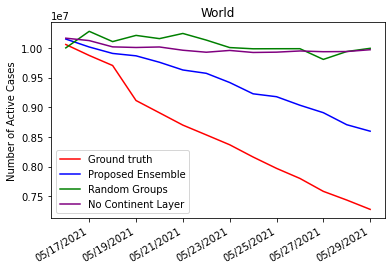

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

start_date = '2021-01-01'
end_date = '2021-05-31'

valid_window = 29
test_window = 29

history_window=14 # days of information
pred_window=14 # predicts future # of days
slide_step=3 # increment

valid_start_date = pd.to_datetime(end_date) + pd.DateOffset(days=-valid_window) + pd.DateOffset(days=-test_window)
test_start_date = pd.to_datetime(end_date) + pd.DateOffset(days=-test_window)

world_ensemble = [10150457,10016774,9908096,9867610,9759169,9628968,9572678,9417512,9226887,9178077,9034421,8908541,8705593,8596234]
world_random = [10001407,10280960,10107610,10212327,10157767,10245023,10133225,10007025,9986287,9987424,9987896,9807240,9940174,9994366]
world_direct = [10165425,10124678,10018724,10008360,10016949,9962022,9928504,9958480,9924325,9929514,9949543,9937179,9940094,9970669]
I_true = [10058856,9873921,9704407,9113707,8906597,8698972,8533923,8367378,8160793,7969293,7799285,7581473,7434742,7277611]

dates = [test_start_date + pd.DateOffset(days=i+history_window) for i in range(pred_window)]
#dates = [valid_start_date + pd.DateOffset(days=i+history_window) for i in range(pred_window)]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.plot(dates, I_true, c='r', label='Ground truth')
plt.plot(dates, world_ensemble, c='b', label='Proposed Ensemble')
plt.plot(dates, world_random, c='g', label="Random Groups")
plt.plot(dates, world_direct, c='purple', label="No Continent Layer")
# stan_res = pickle.load(open(f"stan_results/{loc_name}_stan_results_new", "rb"))
# world_pred = pickle.load(open(f"results/{loc_name}_world_input", 'rb'))
# plt.plot(dates, world_pred[-1, :], c='purple', label="After Calibration")
# stan_sirv_res = pickle.load(open(f"stan_results/{loc_name}_stan_results_sirv", "rb"))
# plt.plot(dates, stan_res[-1, :], c='g', label="STAN (SIRV)")
# plt.plot(dates, sir_I[-1, :], c='purple', label="SIRVIC")
plt.gcf().autofmt_xdate()
plt.legend()
plt.ylabel("Number of Active Cases")
plt.title("World")
plt.show()